## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings  
warnings.filterwarnings("ignore")

# IMPORTING DATA

In [2]:
# Read the data in
Data = pd.read_csv(r"C:\Users\DHANANJAY JAGTAP\Downloads\Python_Dataset\water_potability.csv")

In [3]:
Data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# DATA PRE-PROCESSING

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [48]:
Data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


### CHECKING MISSING VALUES

In [49]:
Data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

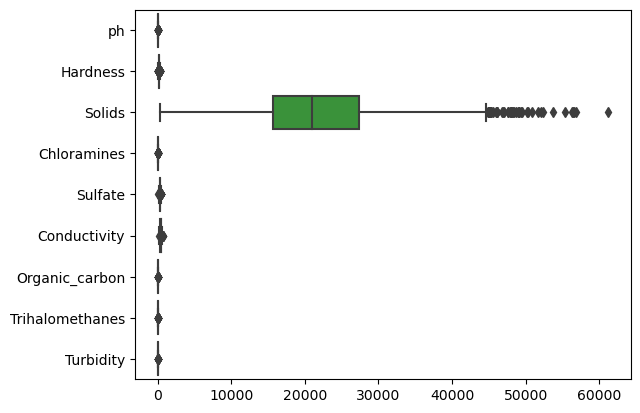

In [50]:
sns.boxplot(data=Data, orient='h')
plt.show()

### TREATING MISSING VALUES BY FILLING MEDIAN IN NULL VALUES 

In [51]:
for column in ['ph','Sulfate','Trihalomethanes']:
    Data[column].fillna(Data[column].median(), inplace=True)

In [52]:
Data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### CHECKING OUTLIERS

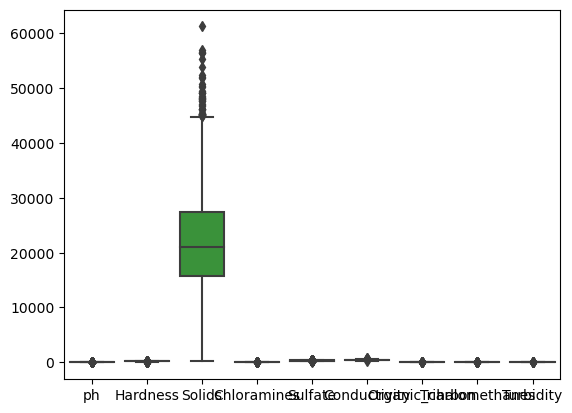

In [53]:
sns.boxplot(data=Data)
plt.show()

### TREATING OUTLIERS BY WINSORIZING TECHNIQUE

In [54]:
for i in Data:
    if Data[i].dtypes in ("float64","int64"):
        q1 = Data[i].quantile(0.25)
        q3 = Data[i].quantile(0.75)
        iqr = q3-q1
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr
        Data[i].clip(upper=ul,lower=ll,inplace=True)

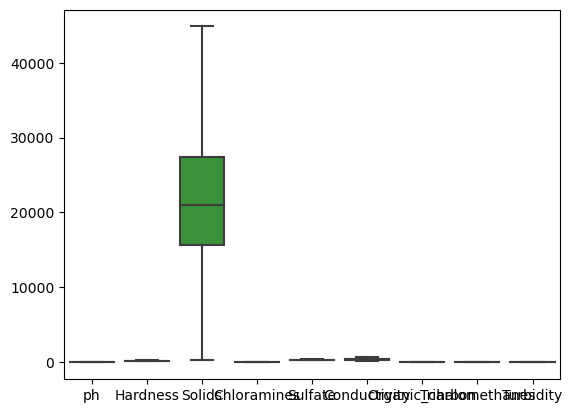

In [55]:
sns.boxplot(data=Data)
plt.show()

### CONVERTING CATEGORICAL COLUMN INTO NUMERIC FOR ANALYSIS

In [56]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   object 
dtypes: float64(9), object(1)
memory usage: 256.1+ KB


In [57]:
Data.select_dtypes(include=[np.number]).columns.tolist()

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

In [58]:
Quantitative_Variable = Data[Data.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.036752,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.889107,129.422921,18630.05786,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.54173,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934


In [59]:
Qualitative_Variable = Data[Data.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,Potability
0,not potable
1,not potable
2,not potable


In [60]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,Potability
0,0
1,0
2,0
3,0
4,0


In [61]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,Potability,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0,7.036752,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,0,3.889107,129.422921,18630.05786,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,0,8.099124,224.236259,19909.54173,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,0,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
4,0,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


## DIVIDING DATA INTO TRAIN AND TEST

In [99]:

from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
x = Final_combined.drop(['Potability'],axis=1)
y = Final_combined[['Potability']]

# Train test split

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,stratify=y,random_state=459)

# Model Building - Logistic Regression

In [100]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler

logreg = LogisticRegression()
Model3 = RandomUnderSampler(sampling_strategy='auto', random_state=42)
Model3.fit_resample(X_train,y_train)

(             ph    Hardness        Solids  Chloramines     Sulfate  \
 0      5.588537  171.333123  17732.240670     5.588614  343.041575   
 1      8.460964  236.831781  13158.848360     5.478276  333.073546   
 2      7.754044  193.449854  19019.279500     8.107067  377.990009   
 3      7.865757  184.912917  16147.001950     7.321343  333.073546   
 4      7.593177  201.068736  19214.186360     7.710120  351.386080   
 ...         ...         ...           ...          ...         ...   
 1785   6.203573  139.129083   6698.239095     3.876813  333.073546   
 1786  10.258615  163.095106  38037.353070     7.602197  350.000236   
 1787   9.241420  127.918826  39566.754350     8.860818  281.995640   
 1788   5.433466  177.828302  31421.731630     4.584134  347.097354   
 1789   7.821971  157.181545  23318.187980     9.084040  324.851659   
 
       Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
 0       466.445429       13.827755        59.376451   4.373999  
 1       547.9

In [101]:
Model3.feature_names_in_

array(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
       'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype=object)

In [102]:
Model3.get_feature_names_out()

array(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
       'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype=object)

In [103]:
X_train = X_train.loc[:,['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate']]
X_train

,ph,Hardness,Solids,Chloramines,Sulfate
264,6.618011,233.661636,19598.86074,4.701049,400.322434
735,7.115895,193.706745,18463.88366,4.924389,319.056951
365,4.788861,234.893703,28174.62052,10.850036,267.157960
3053,7.287286,219.695123,18085.50282,6.010569,277.329713
3051,8.862868,181.665398,17465.09589,7.131704,356.481890
...,...,...,...,...,...
1155,10.258615,163.095106,38037.35307,7.602197,350.000236
3207,9.241420,127.918826,39566.75435,8.860818,281.995640
818,5.433466,177.828302,31421.73163,4.584134,347.097354
316,7.821971,157.181545,23318.18798,9.084040,324.851659


In [104]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
output = logreg.fit(X_train, y_train) # model = output

In [105]:
output.intercept_  # beto 

array([-3.95862073e-06])

In [106]:
output.coef_  # Beta 1 -- 

array([[-2.77431137e-05, -8.08172069e-04,  8.33102370e-06,
        -2.64230855e-05, -1.41110444e-03]])

In [107]:
output.feature_names_in_

array(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate'], dtype=object)

# Prediction on train dataset

In [95]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Potability
264,6.618011,233.661636,19598.86074,4.701049,400.322434,1
735,7.115895,193.706745,18463.88366,4.924389,319.056951,1
365,4.788861,234.893703,28174.62052,10.850036,267.157960,1
3053,7.287286,219.695123,18085.50282,6.010569,277.329713,0
3051,8.862868,181.665398,17465.09589,7.131704,356.481890,0


In [96]:
train['Probability']= output.predict_proba(X_train)[:,1]
train

,ph,Hardness,Solids,Chloramines,Sulfate,Potability,Probability
264,6.618011,233.661636,19598.86074,4.701049,400.322434,1,0.356458
735,7.115895,193.706745,18463.88366,4.924389,319.056951,1,0.388581
365,4.788861,234.893703,28174.62052,10.850036,267.157960,1,0.417627
3053,7.287286,219.695123,18085.50282,6.010569,277.329713,0,0.396855
3051,8.862868,181.665398,17465.09589,7.131704,356.481890,0,0.376417
...,...,...,...,...,...,...,...
1155,10.258615,163.095106,38037.35307,7.602197,350.000236,1,0.423287
3207,9.241420,127.918826,39566.75435,8.860818,281.995640,1,0.457064
818,5.433466,177.828302,31421.73163,4.584134,347.097354,1,0.408056
316,7.821971,157.181545,23318.18798,9.084040,324.851659,1,0.403326


In [97]:
train['Predicted']=np.where(train['Probability'] >= 0.7,1,0) 
train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Potability,Probability,Predicted
264,6.618011,233.661636,19598.86074,4.701049,400.322434,1,0.356458,0
735,7.115895,193.706745,18463.88366,4.924389,319.056951,1,0.388581,0
365,4.788861,234.893703,28174.62052,10.850036,267.157960,1,0.417627,0
3053,7.287286,219.695123,18085.50282,6.010569,277.329713,0,0.396855,0
3051,8.862868,181.665398,17465.09589,7.131704,356.481890,0,0.376417,0


In [98]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['Potability'])
matrix

array([[1398,  895],
       [   0,    0]], dtype=int64)

In [34]:
Accuracy_Train=((1391+0)/(2293)*100)
print(Accuracy_Train)

60.662887047535975


# MODEL BUILDING- DECESION TREE

In [20]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeClassifier()

In [21]:
train=pd.concat([y_train,X_train],axis=1)
train.head()

,Potability,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3081,0,10.258615,141.488391,23989.990150,7.962066,389.392897,361.632055,14.908725,57.164556,3.590841
3072,0,7.036752,205.233634,21829.273150,6.677057,331.674650,338.567758,15.566655,56.608679,2.545631
1017,0,8.551078,216.415932,28909.290280,6.936782,295.223707,510.895001,16.202371,79.859323,4.046380
295,1,6.139494,236.674026,8081.466471,6.250808,333.073546,416.238821,12.777014,106.037222,3.260907
2400,1,3.889107,117.125160,14904.940390,7.729645,400.322434,382.224370,15.872221,66.622485,4.473976


In [22]:
independent_variable = list(train.columns[1:])
independent_variable

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

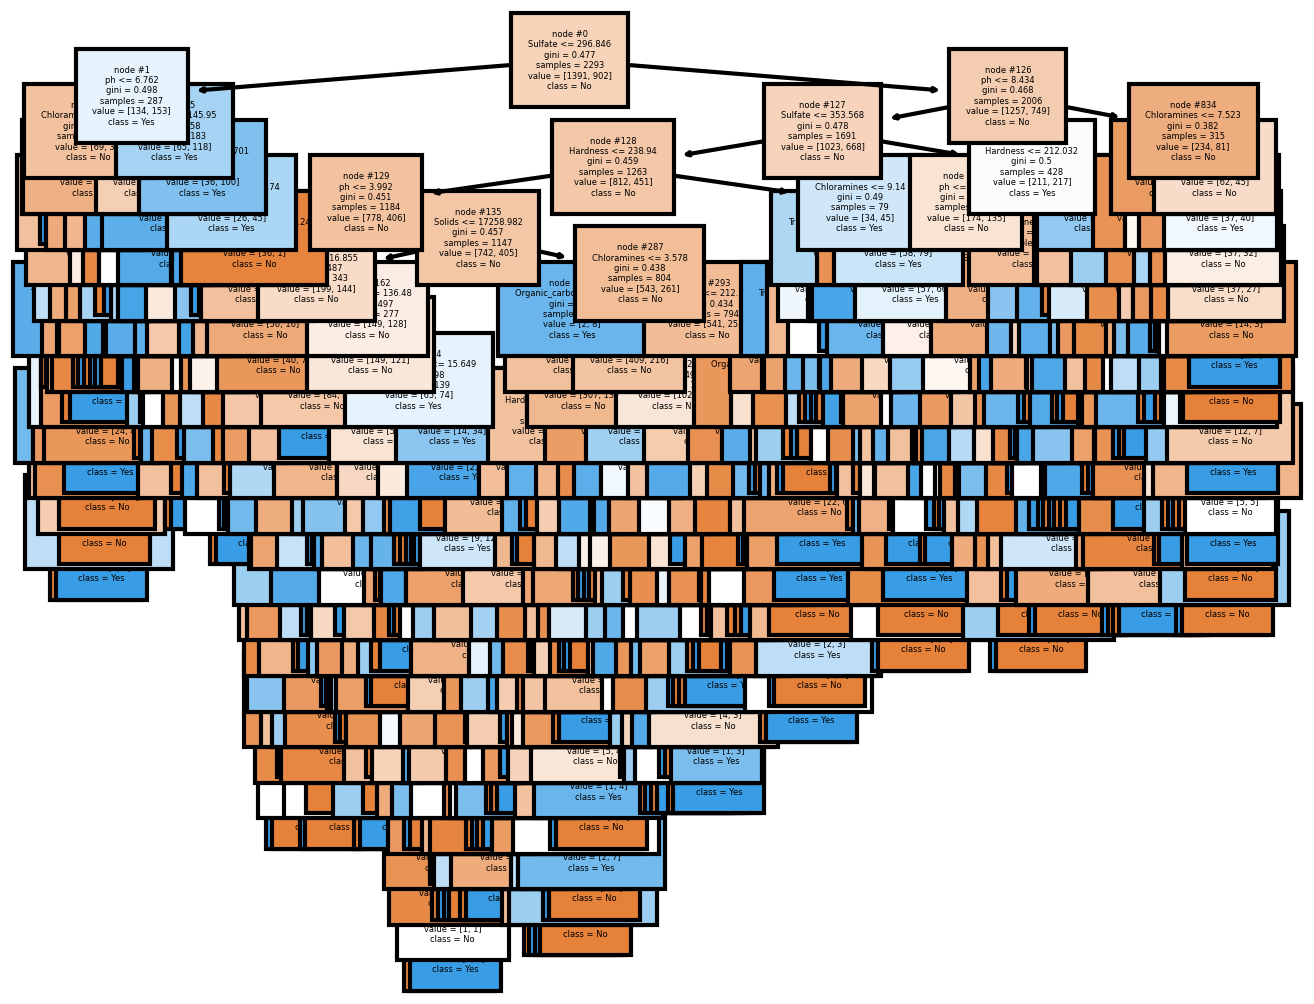

In [23]:
from sklearn import tree
import matplotlib.pyplot as plt

Potability=['No', 'Yes']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=Potability, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

In [24]:
train.head()

,Potability,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3081,0,10.258615,141.488391,23989.990150,7.962066,389.392897,361.632055,14.908725,57.164556,3.590841
3072,0,7.036752,205.233634,21829.273150,6.677057,331.674650,338.567758,15.566655,56.608679,2.545631
1017,0,8.551078,216.415932,28909.290280,6.936782,295.223707,510.895001,16.202371,79.859323,4.046380
295,1,6.139494,236.674026,8081.466471,6.250808,333.073546,416.238821,12.777014,106.037222,3.260907
2400,1,3.889107,117.125160,14904.940390,7.729645,400.322434,382.224370,15.872221,66.622485,4.473976


In [25]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,Potability,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Predicted
3081,0,10.258615,141.488391,23989.990150,7.962066,389.392897,361.632055,14.908725,57.164556,3.590841,0
3072,0,7.036752,205.233634,21829.273150,6.677057,331.674650,338.567758,15.566655,56.608679,2.545631,0
1017,0,8.551078,216.415932,28909.290280,6.936782,295.223707,510.895001,16.202371,79.859323,4.046380,0
295,1,6.139494,236.674026,8081.466471,6.250808,333.073546,416.238821,12.777014,106.037222,3.260907,1
2400,1,3.889107,117.125160,14904.940390,7.729645,400.322434,382.224370,15.872221,66.622485,4.473976,1


In [26]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Potability'])
print(matrix)

[[1391    0]
 [   0  902]]


In [27]:
Accuracy_Train=((1391+902)/(2293)*100)
print(Accuracy_Train)   # overfit or High accuracy

100.0


In [28]:
from sklearn.metrics import classification_report
print(classification_report(train['Potability'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1391
           1       1.00      1.00      1.00       902

    accuracy                           1.00      2293
   macro avg       1.00      1.00      1.00      2293
weighted avg       1.00      1.00      1.00      2293



In [29]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=24, ## child
                                 min_samples_split=12, #parent 
                                 max_depth=7)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=24, min_samples_split=12)

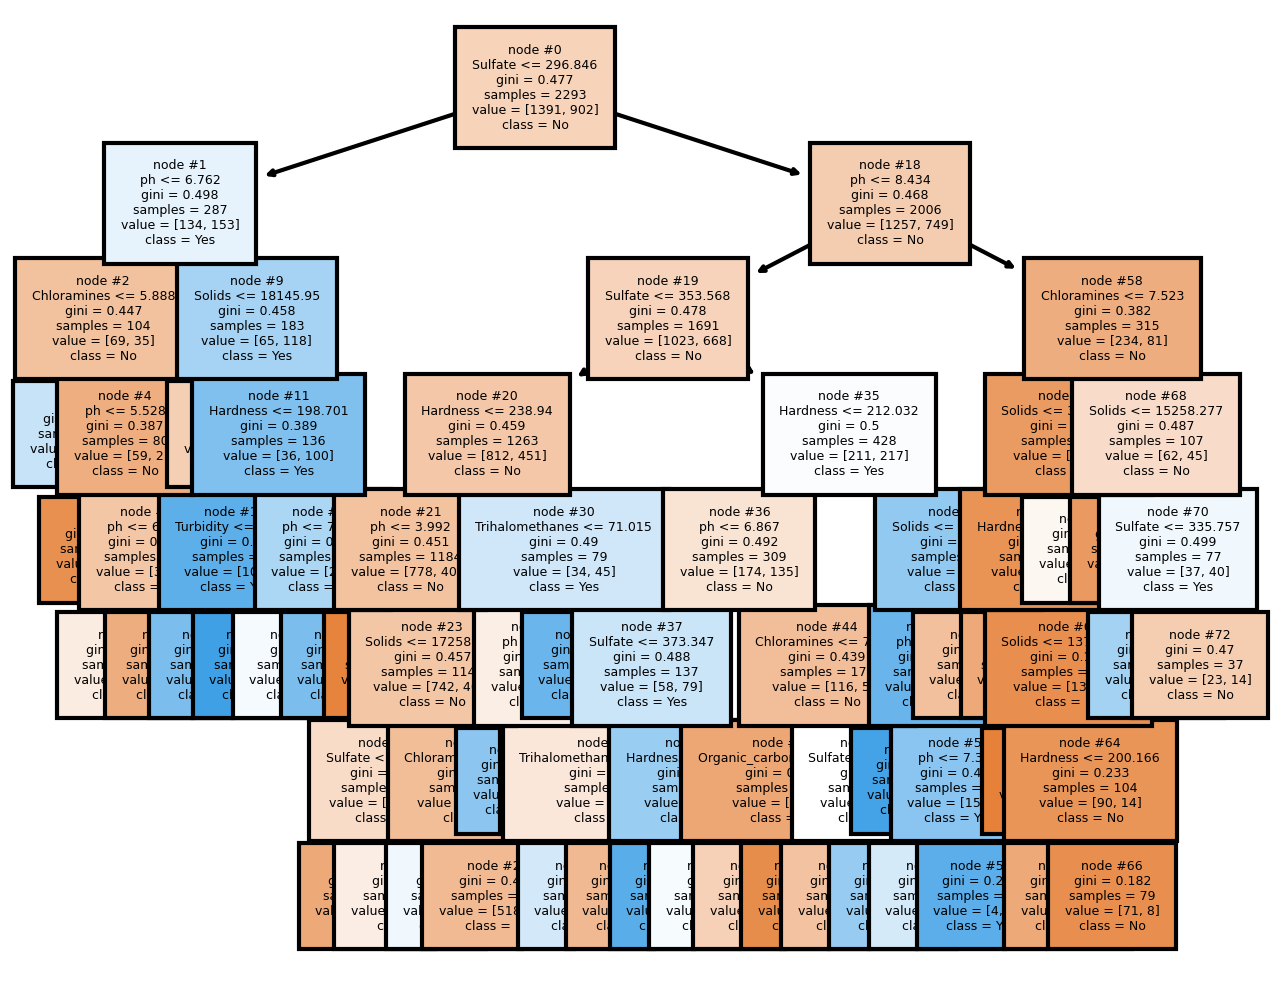

In [30]:
from sklearn import tree
import matplotlib.pyplot as plt

Potability=['No', 'Yes']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=Potability, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=3); # 
#fig.savefig('imagename.png')

In [31]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,Potability,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Predicted
3081,0,10.258615,141.488391,23989.990150,7.962066,389.392897,361.632055,14.908725,57.164556,3.590841,0
3072,0,7.036752,205.233634,21829.273150,6.677057,331.674650,338.567758,15.566655,56.608679,2.545631,0
1017,0,8.551078,216.415932,28909.290280,6.936782,295.223707,510.895001,16.202371,79.859323,4.046380,1
295,1,6.139494,236.674026,8081.466471,6.250808,333.073546,416.238821,12.777014,106.037222,3.260907,0
2400,1,3.889107,117.125160,14904.940390,7.729645,400.322434,382.224370,15.872221,66.622485,4.473976,1


In [32]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Potability'])
print(matrix)

[[1228  536]
 [ 163  366]]


In [33]:
Accuracy_Train=((1274+317)/(2293)*100)
print(Accuracy_Train)

69.38508504143044


In [34]:
from sklearn.metrics import classification_report
print(classification_report(train['Potability'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78      1391
           1       0.69      0.41      0.51       902

    accuracy                           0.70      2293
   macro avg       0.69      0.64      0.64      2293
weighted avg       0.69      0.70      0.67      2293



In [35]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2710,5.654119,171.751551,16431.20490,7.283454,387.904632,419.097306,11.814852,86.308236,3.466264,1
1801,7.323545,184.136070,21044.20266,6.842947,327.261202,379.492453,8.335245,90.312062,4.898421,0
1218,6.280978,205.123123,25972.80375,8.417896,383.671459,456.543945,13.954710,32.799029,4.599432,1
155,6.906992,216.785291,19991.23915,7.302352,340.106028,356.459137,9.614106,61.122644,2.124759,0
434,6.143921,175.274076,29072.16965,11.096086,287.698157,469.983324,13.142493,83.279658,3.476213,0


In [36]:
test['Predicted']=dt.predict(X_test)
test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Predicted
2710,5.654119,171.751551,16431.20490,7.283454,387.904632,419.097306,11.814852,86.308236,3.466264,1,1
1801,7.323545,184.136070,21044.20266,6.842947,327.261202,379.492453,8.335245,90.312062,4.898421,0,0
1218,6.280978,205.123123,25972.80375,8.417896,383.671459,456.543945,13.954710,32.799029,4.599432,1,1
155,6.906992,216.785291,19991.23915,7.302352,340.106028,356.459137,9.614106,61.122644,2.124759,0,0
434,6.143921,175.274076,29072.16965,11.096086,287.698157,469.983324,13.142493,83.279658,3.476213,0,0


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Potability'])
print(confusion_matrix)

[[511 243]
 [ 96 133]]


In [38]:
Accuracy_test=((536+106)/(983)*100)
Accuracy_test

65.31027466937945

In [39]:
from sklearn.metrics import classification_report
print(classification_report(test['Potability'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75       607
           1       0.58      0.35      0.44       376

    accuracy                           0.66       983
   macro avg       0.63      0.60      0.60       983
weighted avg       0.64      0.66      0.63       983



## TUNING BY GRID SEARCH

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = { 'min_samples_split': [5, 4,6], ## Parent 
           'min_samples_leaf': [5,4,6], ## Child or Leave 
           'max_depth':[3,4,6]}  # Branches
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 6], 'min_samples_leaf': [5, 4, 6],
                         'min_samples_split': [5, 4, 6]},
             verbose=1)

In [41]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

In [42]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=5, ## child
                                 min_samples_split=5, #parent 
                                 max_depth=6)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=5)

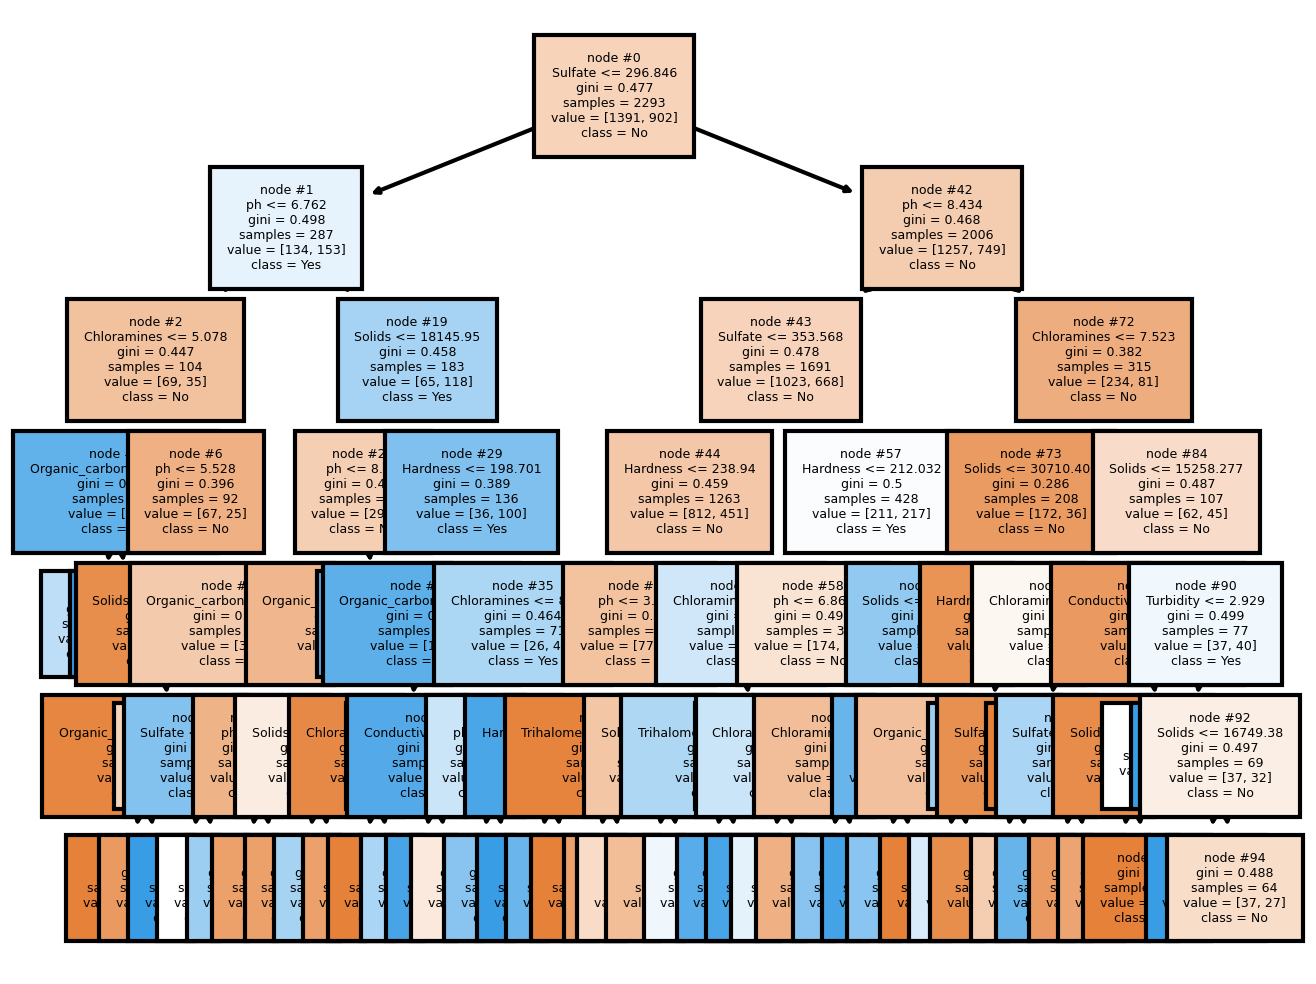

In [43]:
from sklearn import tree
import matplotlib.pyplot as plt

Potability=['No', 'Yes']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=Potability, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=3); # 
#fig.savefig('imagename.png')

In [44]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,Potability,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Predicted
3081,0,10.258615,141.488391,23989.990150,7.962066,389.392897,361.632055,14.908725,57.164556,3.590841,0
3072,0,7.036752,205.233634,21829.273150,6.677057,331.674650,338.567758,15.566655,56.608679,2.545631,0
1017,0,8.551078,216.415932,28909.290280,6.936782,295.223707,510.895001,16.202371,79.859323,4.046380,1
295,1,6.139494,236.674026,8081.466471,6.250808,333.073546,416.238821,12.777014,106.037222,3.260907,0
2400,1,3.889107,117.125160,14904.940390,7.729645,400.322434,382.224370,15.872221,66.622485,4.473976,1


In [45]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Potability'])
print(matrix)

[[1244  533]
 [ 147  369]]


In [46]:
Accuracy_Train=((1244+369)/(2293)*100)
print(Accuracy_Train)

70.34452682075883


# MODEL BUILDING- RANDOM FOREST

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=20, # make 20 tress
                               criterion="gini",
                               max_depth=8,  # each tree will have 4 branches
                               min_samples_split=25,# each tree will have parent node
                               min_samples_leaf=12,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=12, min_samples_split=25,
                       n_estimators=20)

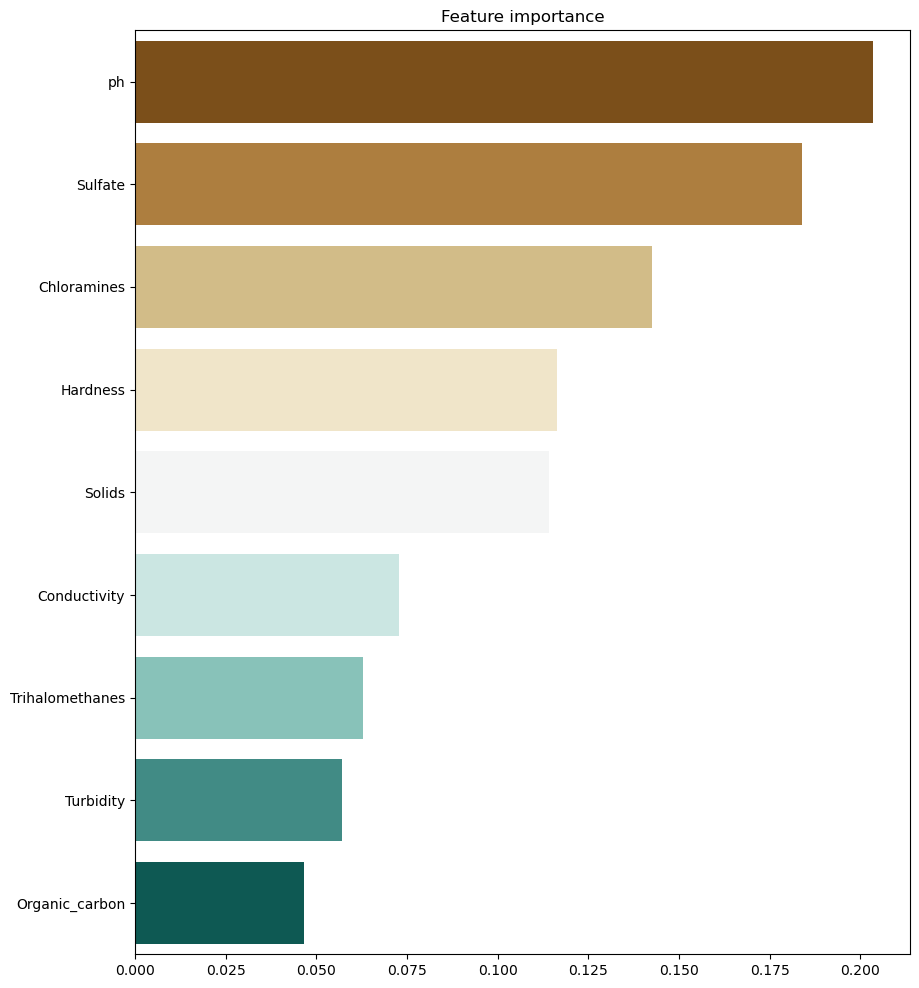

In [48]:
# Plot features importances
imp = pd.Series(data=Model.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')

## Random Forest Visualization

In [49]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [50]:
list(x.columns)

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

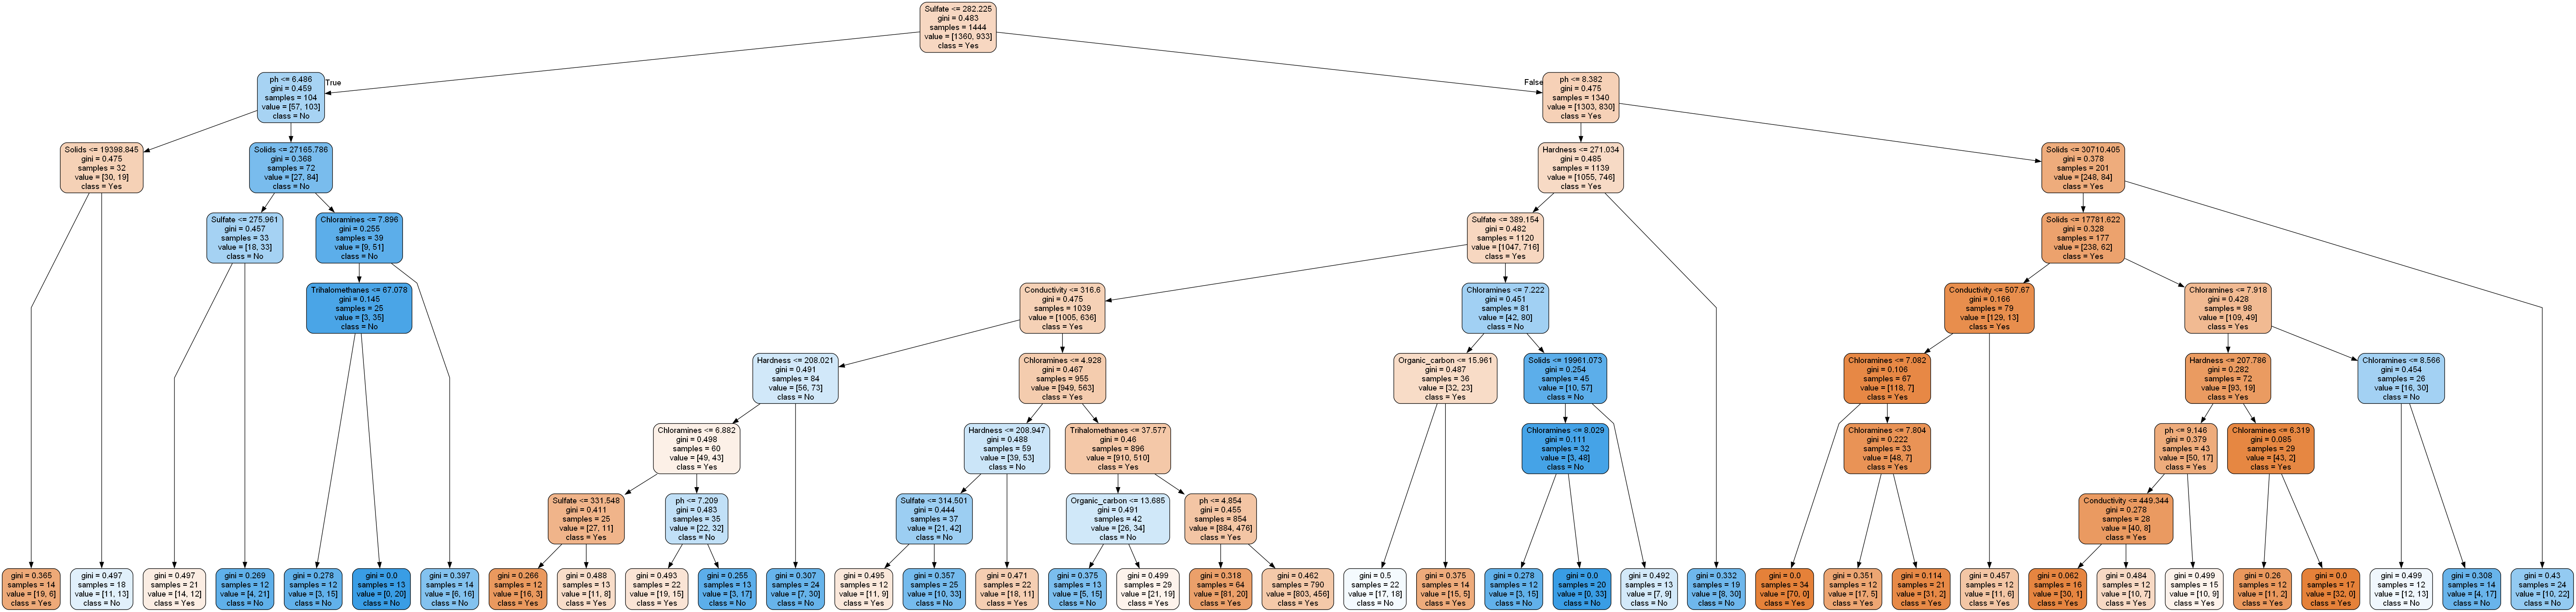

In [51]:
tree = Model.estimators_[5]  # specify the tree number   
Churn=['Yes','No'] 
feature_list = list(x.columns)  # all independent variable name

export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                leaves_parallel=True,
                class_names=Churn,
                rounded = True, 
                filled=True)
# Use dot file to create a graph
(graph,)= pydot.graph_from_dot_file('abc.dot')
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
#if sulfate<=282.2 and ph<=6.4 and solids<=19398.8 (14 samples are
#comes into this category)then we say water is able to drink(19 are  potable,
#6 are notpotable)
#prob of not potable is 19/14
#prob of potable is 6/14.

In [52]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3081,10.258615,141.488391,23989.990150,7.962066,389.392897,361.632055,14.908725,57.164556,3.590841,0
3072,7.036752,205.233634,21829.273150,6.677057,331.674650,338.567758,15.566655,56.608679,2.545631,0
1017,8.551078,216.415932,28909.290280,6.936782,295.223707,510.895001,16.202371,79.859323,4.046380,0
295,6.139494,236.674026,8081.466471,6.250808,333.073546,416.238821,12.777014,106.037222,3.260907,1
2400,3.889107,117.125160,14904.940390,7.729645,400.322434,382.224370,15.872221,66.622485,4.473976,1


In [53]:
train['Predicted']=Model.predict(X_train)
train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Predicted
3081,10.258615,141.488391,23989.990150,7.962066,389.392897,361.632055,14.908725,57.164556,3.590841,0,0
3072,7.036752,205.233634,21829.273150,6.677057,331.674650,338.567758,15.566655,56.608679,2.545631,0,0
1017,8.551078,216.415932,28909.290280,6.936782,295.223707,510.895001,16.202371,79.859323,4.046380,0,0
295,6.139494,236.674026,8081.466471,6.250808,333.073546,416.238821,12.777014,106.037222,3.260907,1,0
2400,3.889107,117.125160,14904.940390,7.729645,400.322434,382.224370,15.872221,66.622485,4.473976,1,1


In [54]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Potability'])
print(matrix)

[[1347  594]
 [  44  308]]


In [55]:
Accuracy_train=((1361+294)/(2293)*100)
Accuracy_train

72.17618839947667

In [56]:
from sklearn.metrics import classification_report
print(classification_report(train['Potability'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.69      0.97      0.81      1391
           1       0.88      0.34      0.49       902

    accuracy                           0.72      2293
   macro avg       0.78      0.65      0.65      2293
weighted avg       0.77      0.72      0.68      2293



In [57]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2710,5.654119,171.751551,16431.20490,7.283454,387.904632,419.097306,11.814852,86.308236,3.466264,1
1801,7.323545,184.136070,21044.20266,6.842947,327.261202,379.492453,8.335245,90.312062,4.898421,0
1218,6.280978,205.123123,25972.80375,8.417896,383.671459,456.543945,13.954710,32.799029,4.599432,1
155,6.906992,216.785291,19991.23915,7.302352,340.106028,356.459137,9.614106,61.122644,2.124759,0
434,6.143921,175.274076,29072.16965,11.096086,287.698157,469.983324,13.142493,83.279658,3.476213,0


In [58]:
test['Predicted']=Model.predict(X_test)
test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Predicted
2710,5.654119,171.751551,16431.20490,7.283454,387.904632,419.097306,11.814852,86.308236,3.466264,1,0
1801,7.323545,184.136070,21044.20266,6.842947,327.261202,379.492453,8.335245,90.312062,4.898421,0,0
1218,6.280978,205.123123,25972.80375,8.417896,383.671459,456.543945,13.954710,32.799029,4.599432,1,0
155,6.906992,216.785291,19991.23915,7.302352,340.106028,356.459137,9.614106,61.122644,2.124759,0,0
434,6.143921,175.274076,29072.16965,11.096086,287.698157,469.983324,13.142493,83.279658,3.476213,0,0


In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Potability'])
print(confusion_matrix)

[[549 285]
 [ 58  91]]


In [60]:
Accuracy_test=((569+94)/(983)*100)
Accuracy_test

67.44659206510681

In [61]:
from sklearn.metrics import classification_report
print(classification_report(test['Potability'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.66      0.90      0.76       607
           1       0.61      0.24      0.35       376

    accuracy                           0.65       983
   macro avg       0.63      0.57      0.55       983
weighted avg       0.64      0.65      0.60       983



## TUNING BY GRID SEARCH

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 4, 5],
    'min_samples_split': [5, 6,7],
    'min_samples_leaf': [5, 6,7]
}

In [63]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=14, # make 14 tress
                               criterion="gini",
                               max_depth=6,  # each tree will have 6 branches
                               min_samples_split=5,# each tree will have parent node
                               min_samples_leaf=4,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=14)

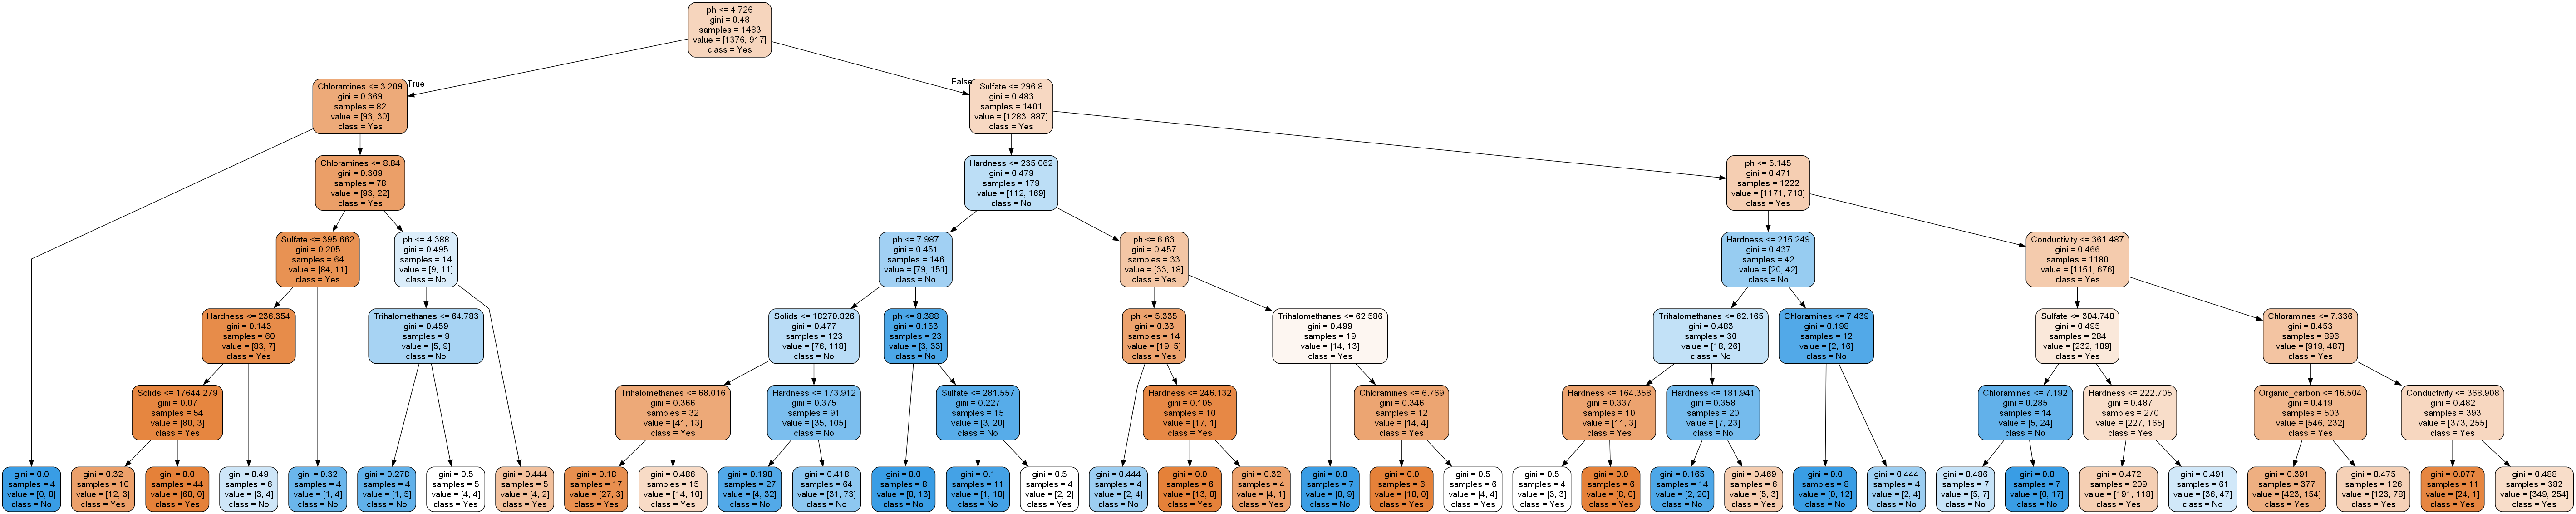

In [65]:
tree = Model.estimators_[5]  # specify the tree number   
Churn=['Yes','No'] 
feature_list = list(x.columns)  # all independent variable name

export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                leaves_parallel=True,
                class_names=Churn,
                rounded = True, 
                filled=True)
# Use dot file to create a graph
(graph,)= pydot.graph_from_dot_file('abc.dot')
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

In [66]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3081,10.258615,141.488391,23989.990150,7.962066,389.392897,361.632055,14.908725,57.164556,3.590841,0
3072,7.036752,205.233634,21829.273150,6.677057,331.674650,338.567758,15.566655,56.608679,2.545631,0
1017,8.551078,216.415932,28909.290280,6.936782,295.223707,510.895001,16.202371,79.859323,4.046380,0
295,6.139494,236.674026,8081.466471,6.250808,333.073546,416.238821,12.777014,106.037222,3.260907,1
2400,3.889107,117.125160,14904.940390,7.729645,400.322434,382.224370,15.872221,66.622485,4.473976,1


In [67]:
train['Predicted']=Model.predict(X_train)
train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Predicted
3081,10.258615,141.488391,23989.990150,7.962066,389.392897,361.632055,14.908725,57.164556,3.590841,0,0
3072,7.036752,205.233634,21829.273150,6.677057,331.674650,338.567758,15.566655,56.608679,2.545631,0,0
1017,8.551078,216.415932,28909.290280,6.936782,295.223707,510.895001,16.202371,79.859323,4.046380,0,0
295,6.139494,236.674026,8081.466471,6.250808,333.073546,416.238821,12.777014,106.037222,3.260907,1,0
2400,3.889107,117.125160,14904.940390,7.729645,400.322434,382.224370,15.872221,66.622485,4.473976,1,1


In [68]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Potability'])
print(matrix)

[[1363  637]
 [  28  265]]


In [69]:
Accuracy_train=((1359+260)/(2293)*100)
Accuracy_train

70.60619276057567

In [70]:
from sklearn.metrics import classification_report
print(classification_report(test['Potability'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.66      0.90      0.76       607
           1       0.61      0.24      0.35       376

    accuracy                           0.65       983
   macro avg       0.63      0.57      0.55       983
weighted avg       0.64      0.65      0.60       983

